In [41]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [42]:
# define fuzzy variables
around_sound = ctrl.Antecedent(np.arange(0, 141, 1), 'around_sound')
Expected_sound = ctrl.Antecedent(np.arange(0, 101, 1), 'Expected_sound')
Headphone_Valume = ctrl.Consequent(np.arange(0, 101, 1), 'Headphone_Valume')

In [43]:
# add fuzzy membership function
around_sound['low'] = fuzz.trimf(around_sound.universe, [0, 0, 70])
around_sound['mid'] = fuzz.trimf(around_sound.universe, [50, 70, 90])
around_sound['high'] = fuzz.trimf(around_sound.universe, [70, 140, 140])

Expected_sound['low'] = fuzz.trimf(Expected_sound.universe, [0, 0, 60])
Expected_sound['mid'] = fuzz.trimf(Expected_sound.universe, [30, 50, 70])
Expected_sound['high'] = fuzz.trimf(Expected_sound.universe, [40, 100, 100])

Headphone_Valume['low'] = fuzz.trimf(Headphone_Valume.universe, [0, 0, 70])
Headphone_Valume['mid'] = fuzz.trimf(Headphone_Valume.universe, [30, 50, 70])
Headphone_Valume['high'] = fuzz.trimf(Headphone_Valume.universe, [30, 100, 100])


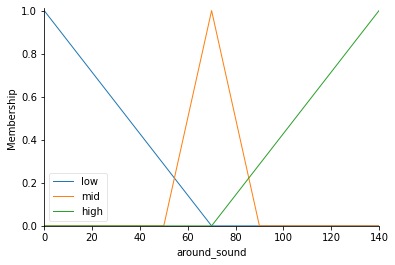

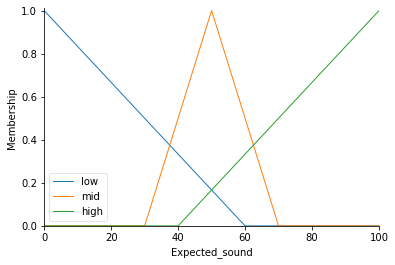

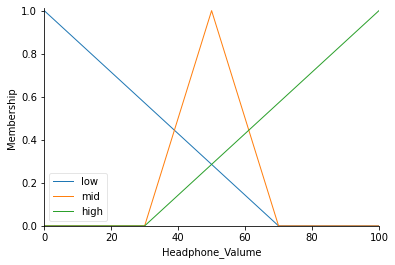

In [44]:
around_sound.view()
Expected_sound.view()
Headphone_Valume.view()
plt.show()

In [45]:
# fuzzy rules
rule1 = ctrl.Rule(around_sound['low'] & Expected_sound['low'], Headphone_Valume['low'])
rule2 = ctrl.Rule(around_sound['low'] & Expected_sound['mid'], Headphone_Valume['low'])
rule3 = ctrl.Rule(around_sound['low'] & Expected_sound['high'], Headphone_Valume['mid'])
rule4 = ctrl.Rule(around_sound['mid'] & Expected_sound['low'], Headphone_Valume['low'])
rule5 = ctrl.Rule(around_sound['mid'] & Expected_sound['mid'], Headphone_Valume['mid'])
rule6 = ctrl.Rule(around_sound['mid'] & Expected_sound['high'], Headphone_Valume['high'])
rule7 = ctrl.Rule(around_sound['high'] & Expected_sound['low'], Headphone_Valume['mid'])
rule8 = ctrl.Rule(around_sound['high'] & Expected_sound['mid'], Headphone_Valume['high'])
rule9 = ctrl.Rule(around_sound['high'] & Expected_sound['high'], Headphone_Valume['high'])

In [46]:
# add rules to conctrol system
Headphone_Valume_rule = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

Headphone_Valume_output = ctrl.ControlSystemSimulation(Headphone_Valume_rule)

In [50]:
def simulate(around_sound, Expected_sound):
    Headphone_Valume_output.input['around_sound'] = around_sound
    Headphone_Valume_output.input['Expected_sound'] = Expected_sound
    Headphone_Valume_output.compute()
    print(
        f'input : core temp = {around_sound} Celsius,clock speed = {Expected_sound} GHz')
    print(
        f'output : cpu fan speed = {Headphone_Valume_output.output["Headphone_Valume"]} RPM')
    Headphone_Valume.view(sim = Headphone_Valume_output)
    plt.show()


input : core temp = 80 Celsius,clock speed = 2 GHz
output : cpu fan speed = 27.95610331835309 RPM


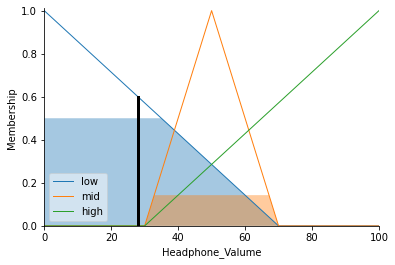

In [51]:
# simulation
simulate(around_sound=80, Expected_sound=2)